In [509]:
import numpy as np
import utils
from importlib import reload
utils = reload(utils)
import plotting_tools as pt
pt = reload(pt)

import scipy.ndimage as sciim

In [1131]:
def wrapper(time, N, suffix, tag, attribute, avg=True, cb=False, get_diff=False, mean=True, shift=None):
    
    inner=True
    
    if cb == False:
        fn = tc.get_filename(N,suffix)
    else:
        sfx = tc.cb_suffix(1,0,suffix)
        fn = tc.get_filename(N,sfx)
        
    path = tc.get_path(fn)
    arr = tc.get_arr(path, time, N, attribute, label_type='STEP', tag=tag, inner=inner, avg=avg).squeeze()
    if mean == True: arr -= arr.mean()

    if get_diff == True:
        arr1 = tc.get_arr(path, time+1, N, attribute, label_type='STEP', tag=tag, inner=inner, avg=avg).squeeze()
        if mean == True: arr1 -= arr1.mean()
        
        return arr1 - arr
    else:
        return arr

# Understanding $\beta$ in the blending time-shifts
## Travelling vortex

Initialise test case scenario

In [973]:
Nx = 128
Ny = 128
et = 1.0
N = 1

base_fn = 'output_travelling_vortex'
py_dir = '../' + base_fn + '/'

tc = utils.test_case(base_fn,py_dir,Nx,Ny,et)
i2 = tc.i2

after_full_step


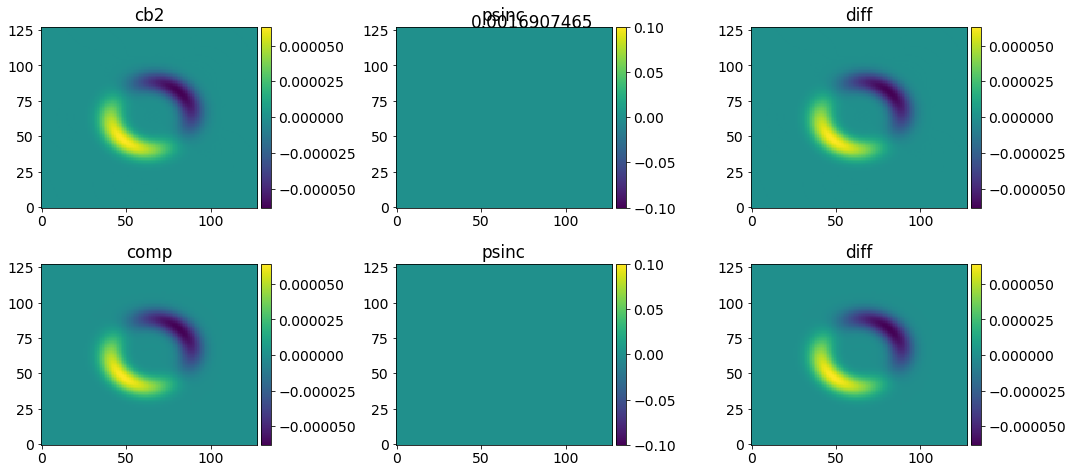

In [313]:
attribute = 'rhoY'
time = 1

tags = tc.get_tag_dict()
tag = tags[9]

comp_sfx = 'comp_bal_debug'
psinc_sfx = 'psinc_debug'
print(tag)

avg = False
get_diff = True
    
comp = wrapper(time, N, comp_sfx, tag, attribute, get_diff=get_diff)
psinc = wrapper(time, N, psinc_sfx, tag, attribute, get_diff=get_diff)
cb1 = wrapper(time, N, 'cb1_w=10-6_debug', tag, attribute, get_diff=get_diff, cb=True)
cb2 = wrapper(time, N, 'cb1_w=10-6_debug', tag, attribute, get_diff=get_diff, cb=True)
# cb2 = wrapper(time, 'cb1_w=0-16_debug', get_diff=get_diff, cb=True)

arr_lst = [[cb2,'cb2'],[psinc,'psinc'],[cb2-psinc,'diff']]
arr_lst += [[comp,'comp'],[psinc,'psinc'],[comp-psinc,'diff']]
norm = np.linalg.norm(cb2-psinc)
pl = pt.plotter(arr_lst, ncols=3, figsize=(15,10))
pl.plot(suptitle=norm, rect=[0, 0.03, 1, 1.01])


#########################################################
# Probe measurement
#########################################################
probe_loc = [0,0]
times = np.arange(0,356)
# times = times[220:230]
cb21_probe, cb22_probe = [], []
cb2_probe = []
#
# for time in times:
#     cb2 = wrapper(time, 'cb1_w=0-16_debug', get_diff=get_diff, cb=True)
#     ii1 = -10/16
#     cb21 = sciim.shift(cb2, ii1, mode='wrap')

#     ii2 = 9/16
#     cb22 = sciim.shift(cb2, ii2, mode='wrap')
    
#     cb21 = cb21[probe_loc[0],probe_loc[1]]
#     cb22 = cb22[probe_loc[0],probe_loc[1]]
    
#     cb21_probe.append(cb21)
#     cb22_probe.append(cb22)
#     cb2_probe.append(cb2[probe_loc[0],probe_loc[1]])

# pl = pt.plotter_1d(ncols=1,nrows=1)

# ax = pl.get_ax(0)
# ax.plot(cb2_probe, label='cb2')
# ax.plot(cb21_probe, label='cb21')
# ax.plot(cb22_probe, label='cb22')
# ax.legend()

# pl.img.show()

#########################################################


#########################################################
# Array shifts
#########################################################

# arr_lst = []
# ii1 = -10/16
# cb21 = sciim.shift(cb2, ii1, mode='wrap')

# ii2 = 9/16
# cb22 = sciim.shift(cb2, ii2, mode='wrap')
# arr_lst += [[cb21,'cb21, %.3f' %ii1],[cb22,'cb22, %.3f' %ii2],[cb21-cb22,'diff']]
# norm = np.linalg.norm(cb21-psinc)
# arr_lst += [[cb21,'cb21, %.3f' %i],[psinc,'psinc'],[cb21-psinc,'diff, %.6f' %norm]]
# norm = np.linalg.norm(cb22-psinc)
# arr_lst += [[cb22,'cb22, %.3f' %i],[psinc,'psinc'],[cb22-psinc,'diff, %.6f' %norm]]
# pl = pt.plotter(arr_lst, ncols=3, figsize=(15,15))
# pl.plot()

#########################################################


#########################################################
# Array plots with varying shifts
#########################################################
alst = np.arange(-16,17,0.01)
alst = [10.0]
# alst = np.arange(-16,17,1)
times = np.arange(1,354)
for time in times:
    psinc = wrapper(time, N, psinc_sfx, tag, attribute, get_diff=get_diff)
    cb2 = wrapper(time, N, 'cb1_w=10-6_debug', tag, attribute, get_diff=get_diff, cb=True)
#     cb2 = wrapper(time, 'cb1_w=0-16_debug', get_diff=get_diff, cb=True)
#     cb2 = wrapper(time, 'comp_bal_debug', get_diff=get_diff, cb=False)
    min_norm, min_weight = np.inf, np.inf
    for i in alst:
    #     ii = i/16
        ii = i/16
        cb2s = sciim.shift(cb2, ii, mode='wrap')
    #     arr_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
        norm = np.linalg.norm(cb2s-psinc)

    #     pl = pt.plotter(arr_lst, ncols=3, figsize=(15,5))
    #     pl.plot(suptitle=norm, rect=[0, 0.03, 1, 1.01])

        if norm < min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]

#     print(time, min_norm, min_weight, min_weight/16)
#     pl = pt.plotter(min_lst, ncols=3, figsize=(15,5))
#     pl.plot(suptitle=min_norm, rect=[0, 0.03, 1, 1.01])
    
# arr_lst = [[comp,'comp'],[psinc,'psinc'],[comp-psinc,'diff']]
# arr_lst += [[cb1,'cb1'],[psinc,'psinc'],[cb1-psinc,'diff']]
# arr_lst += [[cb2,'cb2'],[psinc,'psinc'],[cb2-psinc,'diff']]

after_full_step


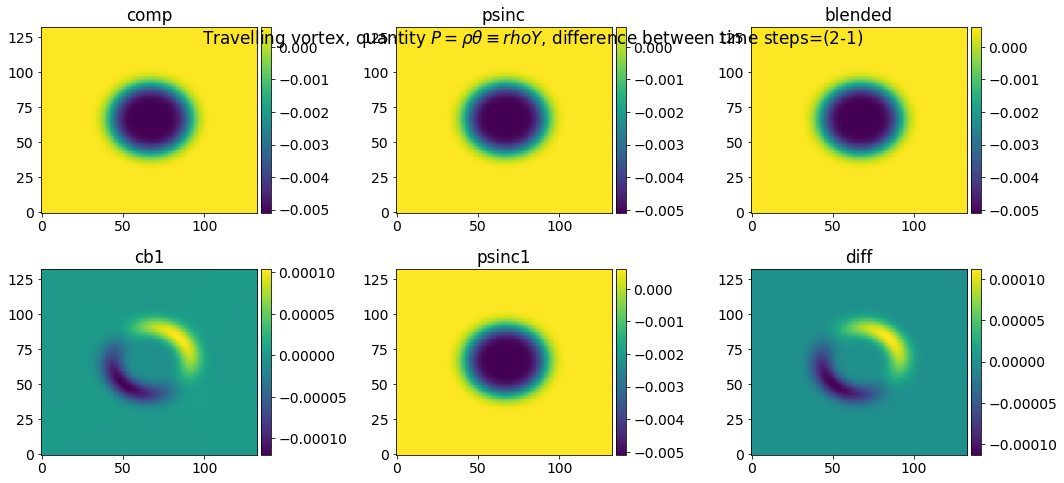

In [911]:
attribute = 'p2_nodes'
time = 1

tags = tc.get_tag_dict()

comp_sfx = 'comp_bal_debug'
psinc_sfx = 'psinc_bal_debug_nr'

avg = True
get_diff = False

tag = tags[9]
print(tag)
comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff)

# tag = tags[4]
# print(tag)
psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff)
psinc2 = wrapper(time+1, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff)

psinc = 0.5*(psinc1+psinc2)

cb1_sfx = 'w=8-8_nr'
cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff, cb=True)

arr_lst = [[comp1,'comp'],[psinc,'psinc'],[cb1,'blended']]
arr_lst += [[comp1-psinc,'cb1'],[psinc,'psinc1'],[cb1-psinc,'diff']]

# alst = np.arange(-16.0,16.01,0.01)
# min_norm, min_weight = np.inf, np.inf
# for i in alst:
#     ii = i/16.0
#     shifted = cb1
#     shifted = sciim.shift(shifted,ii, mode ='wrap')
#     norm = np.linalg.norm(shifted-psinc1)

#     if norm < min_norm:
#         min_norm = norm
#         min_weight = i
#         min_lst = [[shifted,'shifted, %.3f' %i],[psinc1,'psinc'],[shifted-psinc1,'diff']]
#         shifted_arr = np.copy(shifted)
    
# print(min_norm, min_weight)

# arr_lst += [[shifted_arr,'shifted'],[psinc1,'psinc1'],[shifted_arr-psinc1,'diff']]

pl = pt.plotter(arr_lst, ncols=3, figsize=(15,10))
pl.plot(suptitle=r'Travelling vortex, quantity $P=\rho\theta\equiv rhoY$, difference between time steps=(%i-%i)' %(time+1, time), rect=[0, 0.03, 1, 1.03])

1 0.09129773 -2.8900000000002795 -0.18062500000001747


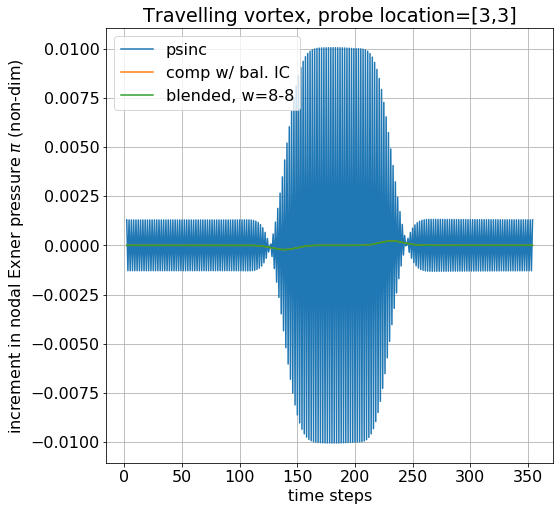

In [960]:
Nsteps = 355
times = np.arange(0,Nsteps)
# times = times[190:211]
times = times[1:]
probe_loc = [3,3]

avg = True
diff = True
attribute = 'p2_nodes'

suffix = 'comp_bal_debug_nr'
comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'psinc_debug_nr'
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'w=8-8_nr'
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=0-16_debug'
cb21 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

alst = np.arange(-16,17,0.01)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    cb2s = sciim.shift(cb1,ii, mode ='wrap')
    norm = np.linalg.norm(cb2s-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
    
print(time, min_norm, min_weight, min_weight/16)

# cb21 = sciim.shift(cb21,min_weight/16)

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(cb22,-10/16)


pl = pt.plotter_1d(ncols=1,nrows=1,figsize=(8,8))

t_axs = times if diff == False else times[1:]
ax = pl.get_ax(0)
# ax.plot(t_axs[1:],0.5*(psinc[1:]+psinc[:-1]), label='psinc')

from scipy.signal import savgol_filter
# import scipy.fftpack
# psinc1 = 0.5*(psinc[1:]+psinc[:-1])
# psinc_smooth = savgol_filter(psinc, 21, 3)
# w = scipy.fftpack.rfft(psinc)
# spectrum = w**2
# cutoff_idx = spectrum < (spectrum.max()/5000)
# cutoff_idx += spectrum == spectrum.max()
# w2 = w.copy()
# w2[cutoff_idx] = 0
# psinc_smooth = scipy.fftpack.irfft(w2)

# psinc_smooth = psinc
# trunc = slice(200,231)
trunc = slice(0,None)
t_axs = t_axs[trunc]
psinc_smooth = psinc_smooth[trunc]
# psinc_smooth = 0.5*(psinc_smooth[1:]+psinc_smooth[:-1])
comp = comp[trunc]
ax.plot(t_axs,psinc, label='psinc')
ax.plot(t_axs,comp, label='comp w/ bal. IC')
ax.plot(t_axs,cb1, label='blended, w=8-8')

# ax.plot(spectrum)

pss = sciim.shift(psinc_smooth,-6/16, mode ='wrap')
# ax.plot(t_axs,pss, label='pss')
# ax.plot(t_axs,cb1, label=r'blended (optimal $\beta=5/8$)')
# ax.plot(t_axs,cb21, label=r'blended ($\beta=0$)')
ax.set_xlabel("time steps")
ax.set_ylabel(r'increment in nodal Exner pressure $\pi$ (non-dim)')
ax.grid()
# ax.plot(cb22, label='cb22')
ax.legend()
pl.img.title('Travelling vortex, probe location=[%i,%i]' %(probe_loc[0],probe_loc[1]))
# ax.set_xlim([200,250])

pl.img.show()

after_half_step
before_advect
9.801195e-06 5.679999999999538 0.3549999999999711


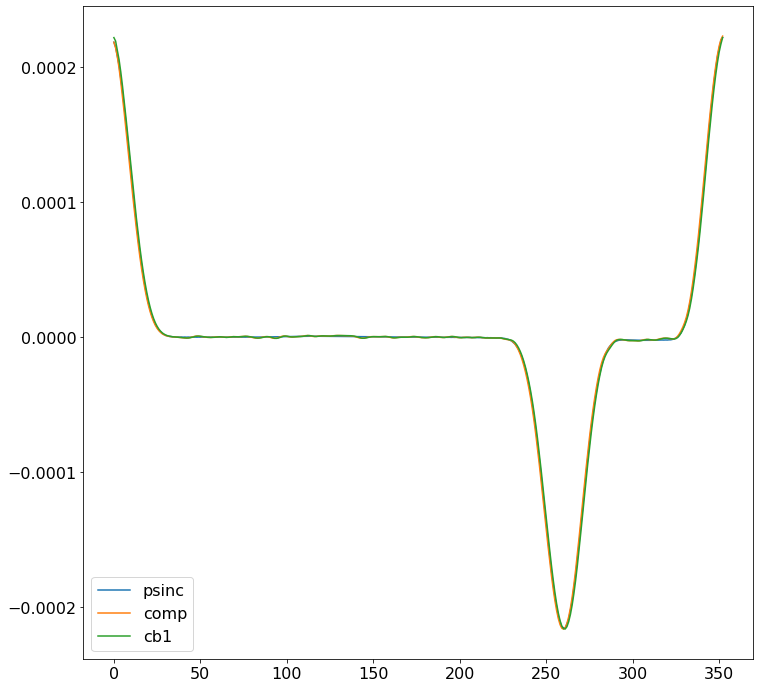

In [1037]:
Nsteps = 355
times = np.arange(0,Nsteps)
# times = times[210:240]
times = times[1:]
probe_loc = [47,47]

avg = True
diff = True

suffix = 'comp_bal_debug'
# suffix = 'psinc_debug_orig'
tag = tags[5]
print(tag)
comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'psinc_debug_orig'
tag = tags[1]
print(tag)
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=10-6_debug'
tag = tags[1]
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=0-16_debug'
cb21 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

alst = np.arange(-16,16.01,0.01)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    
    shifted = comp
#     shifted = np.pad(shifted,2,mode='wrap')
#     print(comp)
#     print(shifted)
    shifted = sciim.shift(shifted,ii, mode ='wrap')
#     print(shifted)
#     shifted_ = np.copy(shifted)
#     shifted = shifted[2:-2]
    
    norm = np.linalg.norm(shifted-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[shifted,'cb2, %.3f' %i],[psinc,'psinc'],[shifted-psinc,'diff']]
        shifted0 = np.copy(shifted)
#     assert(0)
    
print(min_norm, min_weight, min_weight/16)

cb1 = sciim.shift(shifted0,min_weight/16,mode='wrap')

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(cb22,-10/16)

pl = pt.plotter_1d(ncols=1,nrows=1)

ax = pl.get_ax(0)
ax.plot(psinc, label='psinc')
ax.plot(comp, label='comp')
ax.plot(cb1, label='cb1')
# ax.plot(cb21, label='cb21')
# ax.plot(cb22, label='cb22')
ax.legend()
# ax.set_xlim([200,250])

pl.img.show()

In [974]:
Nsteps = 355
times = np.arange(0,Nsteps)
times = times[1:]
mws = []
mws_comp = []
attribute = 'p2_nodes'

tag_id = 9
idxs = np.arange(128)
for idx in idxs:
    probe_loc = [idx,idx]

    avg = True
    diff = False

    suffix = 'comp_bal_debug'
    tag = tags[tag_id]
    comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = 'psinc_debug_nr'
#     tag = tags[9]
    psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)
    psinc = savgol_filter(psinc, 21, 3)
    
#     suffix = 'cb1_w=10-6_debug'
    suffix = 'w=8-8_nr'
#     tag = tags[5]
    cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

    alst = np.arange(-16,16.1,0.1)
    min_norm, min_weight = np.inf, np.inf
    min_norm_comp, min_weight_comp = np.inf, np.inf
    for i in alst:
        ii = i / 16
        shifted_comp = np.copy(comp)
        shifted = np.copy(cb1)
#         shifted = np.pad(shifted,[2,2],mode='wrap')
        if ii >0.0:
            cval_comp = find_nearest(psinc,comp[0])
            cval_cb1 = find_nearest(psinc,cb1[0])
        else:
            cval_comp = find_nearest(psinc,comp[-1])
            cval_cb1 = find_nearest(psinc,cb1[-1])
            
        shifted_comp = sciim.shift(shifted_comp,ii, mode ='constant',cval=cval_comp)
        shifted = sciim.shift(shifted,ii, mode ='constant',cval=cval_cb1)
#         shifted = shifted[2:-2]

        norm_comp = np.linalg.norm(shifted_comp-psinc)
        norm = np.linalg.norm(shifted-psinc)
    
        if norm_comp < min_norm_comp:
            min_norm_comp = norm_comp
            min_weight_comp = i
            min_lst_comp = [[shifted_comp,'cb2, %.3f' %i],[psinc,'psinc'],[shifted_comp-psinc,'diff']]
            shifted0_comp = np.copy(shifted_comp)
            
        if norm < min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[shifted,'cb2, %.3f' %i],[psinc,'psinc'],[shifted-psinc,'diff']]
            shifted0 = np.copy(shifted)

#     print(idx, min_norm, min_weight, min_norm_comp, min_weight_comp)
    mws.append(min_weight)
    mws_comp.append(min_weight_comp)
    
np.savetxt('tv_mws_%i.txt' %tag_id,mws)
np.savetxt('tv_mws_comp_%i.txt' %tag_id,mws_comp)

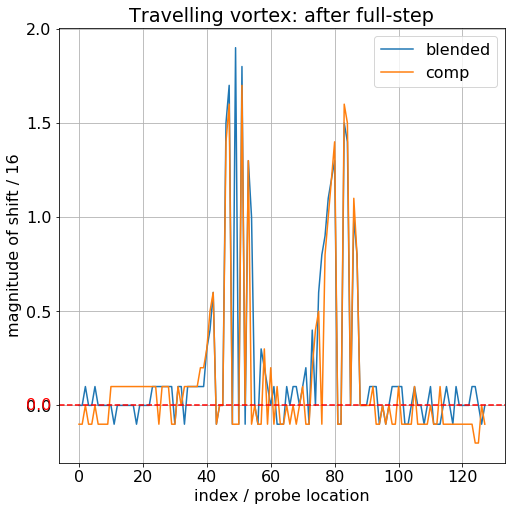

0.18203124999994297
0.12421874999994313


In [975]:
import matplotlib.transforms as transforms
mws0 = np.copy(mws)
mws0_comp = np.copy(mws_comp)

# tag_id = 5
pl = pt.plotter_1d(nrows=1,ncols=1,figsize=(8,8))
ax = pl.get_ax(0)
ax.plot(idxs,mws, label='blended')
ax.plot(idxs,mws_comp, label='comp')
hline = 0.0
ax.axhline(hline, ls='--', c='r')

titles = {
    4: 'after half-step, before reset',
    5: 'after half-step, after reset',
    9: 'after full-step'
}

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.0,hline, "{:.1f}".format(hline), color="red", transform=trans, 
        ha="right", va="center")

ax.set_xlabel("index / probe location")
ax.set_ylabel("magnitude of shift / 16")
ax.set_title("Travelling vortex: %s" %titles[tag_id])

yticks = ax.yaxis.get_major_ticks()
# yticks[3].label1.set_visible(False)

ax.legend()
ax.grid()
pl.img.show()
print(np.mean(mws))
print(np.mean(mws_comp))

## Rising bubble

In [1256]:
Nx = 100
Ny = 50
et = 10.0
N = 1

base_fn = 'output_rising_bubble'
py_dir = '../' + base_fn + '/'

tc = utils.test_case(base_fn,py_dir,Nx,Ny,et)
i2 = tc.i2

after_full_step


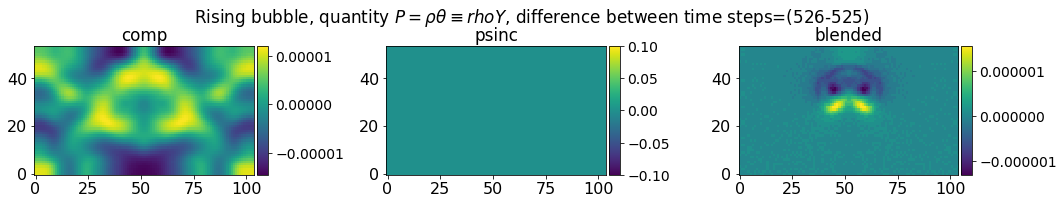

In [751]:
time = 525

tags = tc.get_tag_dict()

comp_sfx = 'comp_debug'
psinc_sfx = 'psinc_debug'

attribute = 'rhoY'

avg = False
get_diff = True

tag = tags[9]
# tag = 'ic'
print(tag)
comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff).T
psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

cb1_sfx = tc.cb_suffix(1,0,'cb1_w=0-16_debug')
cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

arr_lst = [[comp1,'comp'],[psinc1,'psinc'],[cb1,'blended']]
# arr_lst = [[comp1,'comp1'],[psinc1,'psinc1'],[comp1-psinc1,'diff']]
# arr_lst += [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]
# arr_lst += [[cb1,'cb1'],[comp1,'comp1'],[comp1-cb1,'diff']]
# arr_lst += [[comp1-cb1,'cb1'],[comp1-psinc1,'comp1'],[(comp1-psinc1)-(comp1-cb1),'diff']]
norm = np.linalg.norm(comp1-psinc1)
pl = pt.plotter(arr_lst, ncols=3, figsize=(15,3))
pl.plot(suptitle=r'Rising bubble, quantity $P=\rho\theta\equiv rhoY$, difference between time steps=(%i-%i)' %(time+1, time), rect=[0, 0.03, 1, 0.96])

after_full_step


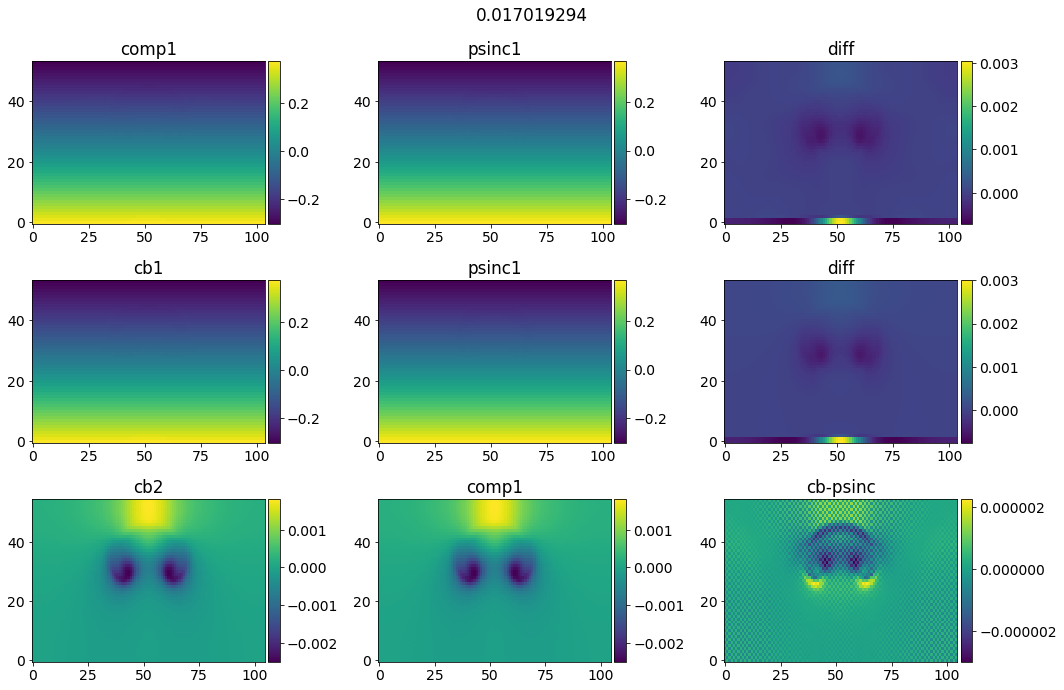

In [1117]:
time = 526

tags = tc.get_tag_dict()

comp_sfx = 'comp_debug'
psinc_sfx = 'psinc_debug'

attribute = 'rho'

avg = False
get_diff = False

tag = tags[9]
print(tag)
comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff).T
psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

cb1_sfx = tc.cb_suffix(1,0,'w=10-6')
cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

# comp1 = comp1[2:-3,:]
# psinc1 = psinc1[2:-3,:]
# cb1 = cb1[2:-3,:]

arr_lst = [[comp1,'comp1'],[psinc1,'psinc1'],[comp1-psinc1,'diff']]
arr_lst += [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]

attribute = 'p2_nodes'
psinc2 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

cb2_sfx = tc.cb_suffix(1,0,'w=10-6')
cb2 = wrapper(time, N, cb2_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

arr_lst += [[cb2,'cb2'],[psinc2,'comp1'],[cb2-psinc2,'cb-psinc']]

# arr_lst += [[comp1-cb1,'cb1'],[cb1-(cb1-psinc1),'comp1'],[cb2-(cb1-psinc1),'diff']]
norm = np.linalg.norm(comp1-psinc1)
pl = pt.plotter(arr_lst, ncols=3, figsize=(15,13))
pl.plot(suptitle=norm, rect=[0, 0.03, 1, 0.96])

after_full_step
after_full_step
9.798974e-07 7.039999999999509 0.4399999999999693


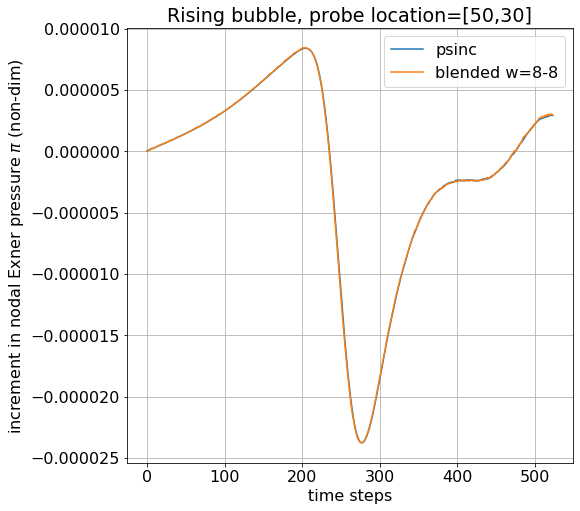

In [1121]:
Nsteps = 526
times = np.arange(0,Nsteps)
times = times[1:]
# times = times[210:240]
probe_loc = [50,30]

avg = True
diff = True

attribute = 'p2_nodes'

suffix = 'comp_debug'
# suffix = 'psinc_debug_orig'
tag = tags[9]
print(tag)
comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'psinc_debug'
tag = tags[9]
print(tag)
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'w=10-6'
tag = tags[9]
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

alst = np.arange(-16,16.01,0.01)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    cb2s = sciim.shift(cb1,ii, mode ='constant')
    norm = np.linalg.norm(cb2s-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
    
print(min_norm, min_weight, min_weight/16)

cb10 = np.copy(cb1)
cb1 = sciim.shift(cb1, min_weight/16)

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(cb22,-10/16)

pl = pt.plotter_1d(ncols=1,nrows=1, figsize=(8,8))

ax = pl.get_ax(0)
ax.plot(psinc, label='psinc')
# ax.plot(comp, label='comp')
ax.plot(cb10, label='blended w=8-8')
# ax.plot(cb10, label='cb10')
# ax.plot(cb21, label='cb21')
# ax.plot(cb22, label='cb22')
ax.set_xlabel("time steps")
ax.set_ylabel(r'increment in nodal Exner pressure $\pi$ (non-dim)')
ax.grid()
ax.legend()
pl.img.title('Rising bubble, probe location=[%i,%i]' %(probe_loc[0],probe_loc[1]))

pl.img.show()

In [1283]:
Nsteps = 526
times = np.arange(0,Nsteps)
times = times[1:]
idxs = np.arange(0,50)

attribute = 'p2_nodes'
mws = []
mws_comp = []

tag_id = 0
for idx in idxs:
    probe_loc = [50,idx]

    avg = True
    diff = False

    suffix = 'comp_debug'
    tag = tags[tag_id]
    comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = 'psinc_debug'
#     tag = tags[9]
    psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = 'w=16-0'
#     tag = tags[5]
    cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

    alst = np.arange(-16,16.1,0.1)
    min_norm, min_weight = np.inf, np.inf
    min_norm_comp, min_weight_comp = np.inf, np.inf
    for i in alst:
        ii = i / 16
        shifted_comp = np.copy(comp)
        shifted = np.copy(cb1)
#         shifted = np.pad(shifted,[2,2],mode='wrap')
        if ii >0.0:
            cval_comp = find_nearest(psinc,comp[0])
            cval_cb1 = find_nearest(psinc,cb1[0])
        else:
            cval_comp = find_nearest(psinc,comp[-1])
            cval_cb1 = find_nearest(psinc,cb1[-1])
            
        shifted_comp = sciim.shift(shifted_comp,ii, mode ='constant',cval=cval_comp)
        shifted = sciim.shift(shifted,ii, mode ='constant',cval=cval_cb1)
#         shifted = shifted[2:-2]

        norm_comp = np.linalg.norm(shifted_comp-psinc)
        norm = np.linalg.norm(shifted-psinc)

        if norm_comp < min_norm_comp:
            min_norm_comp = norm_comp
            min_weight_comp = i
            min_lst_comp = [[shifted_comp,'cb2, %.3f' %i],[psinc,'psinc'],[shifted_comp-psinc,'diff']]
            shifted0_comp = np.copy(shifted_comp)
            
        if norm < min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[shifted,'cb2, %.3f' %i],[psinc,'psinc'],[shifted-psinc,'diff']]
            shifted0 = np.copy(shifted)

#     print(idx, min_norm, min_weight, min_norm_comp, min_weight_comp)
    mws.append(min_weight)
    mws_comp.append(min_weight_comp)
        
# np.savetxt('rb_mws_%i.txt' %tag_id,mws)
# np.savetxt('rb_mws_comp_%i.txt' %tag_id,mws_comp)

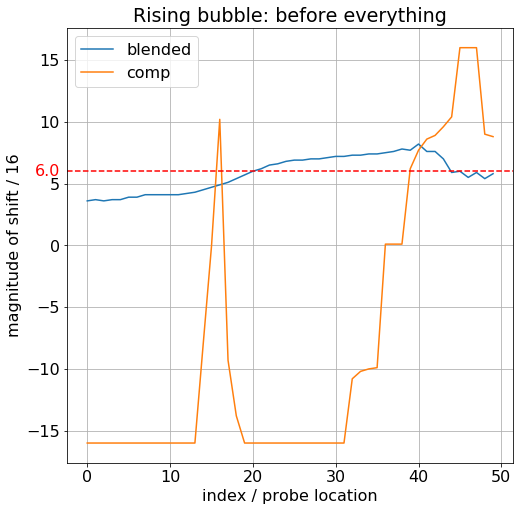

5.8339999999999215
-7.528000000000031


In [1284]:
import matplotlib.transforms as transforms
mws0 = np.copy(mws)
mws0_comp = np.copy(mws_comp)

# tag_id = 5
pl = pt.plotter_1d(nrows=1,ncols=1,figsize=(8,8))
ax = pl.get_ax(0)
ax.plot(idxs,mws, label='blended')
ax.plot(idxs,mws_comp, label='comp')
hline = 6.0
ax.axhline(hline, ls='--', c='r')

titles = {
    0: 'before everything',
    1: 'before 1st projection advect',
    2: 'after 1st projection advect',
    3: 'after 1st proj. euler explicit',
    4: '1st proj: euler impl',
    5: 'after 1st proj: pi reset',
    6: '2nd proj: after euler forward',
    7: '2nd proj: after advect',
    8: '2nd proj: after euler explicit',
    9: 'after 2nd: proj'
}

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.0,hline, "{:.1f}".format(hline), color="red", transform=trans, 
        ha="right", va="center")

ax.set_xlabel("index / probe location")
ax.set_ylabel("magnitude of shift / 16")
ax.set_title("Rising bubble: %s" %titles[tag_id])

yticks = ax.yaxis.get_major_ticks()
# yticks[4].label1.set_visible(False)

ax.legend()
ax.grid()
pl.img.show()
print(np.mean(mws))
print(np.mean(mws_comp))

# Skamarock / Klemp waves

In [1230]:
Nx = 301
Ny = 10
et = 30.0
N = 1

scales = ['standard', 'long', 'planetary']
scale = scales[2]
if scale == 'planetary':
    et = 4800.0

base_fn = 'output_internal_long_wave'
py_dir = '../' + base_fn + '/'

tc = utils.test_case(base_fn,py_dir,Nx,Ny,et)
i2 = tc.i2

after_full_step


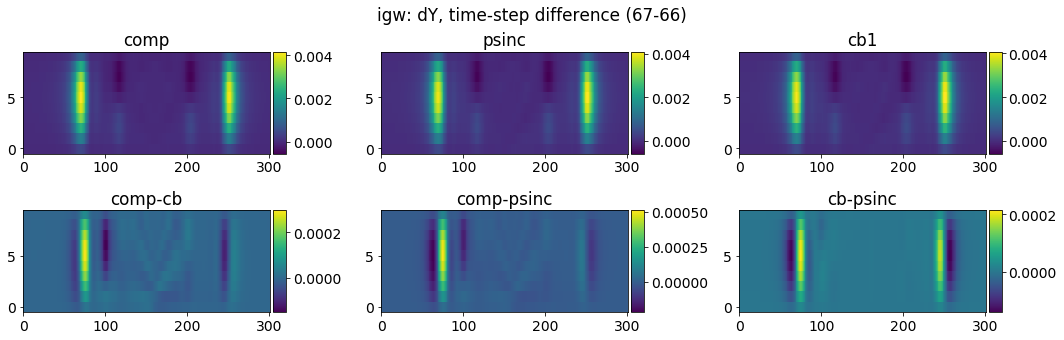

In [1157]:
time = 66
Tref = 300.0

tags = tc.get_tag_dict()

comp_sfx = '%s_comp_debug' %scale
# comp_sfx = '%s_comp' %scale
psinc_sfx = '%s_psinc_debug_nr' %scale
# psinc_sfx = '%s' %scale

# attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
# attributes = ['rho']
attributes = ['dY']
avg = False
get_diff = False
mean = False

tag_id = 9
tag = tags[tag_id]
# tag1 = tags[tag_id+1]
# tag = 'ic'
print(tag)
for attribute in attributes:
    comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff,mean=mean).T
    psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff,mean=mean).T
    
#     psinc2 = wrapper(time+1, N, psinc_sfx, tags[9], attribute, avg=avg, get_diff=get_diff,mean=mean).T
#     psinc = psinc2-psinc1

    # comp1 /= wrapper(time, N, comp_sfx, tag, attributes[1], avg=avg, get_diff=get_diff).T
    # psinc1 /= wrapper(time, N, psinc_sfx, tag, attributes[1], avg=avg, get_diff=get_diff).T

    cb1_sfx = tc.cb_suffix(1,0,'%s_w=8-8' %scale)
    cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff,mean=mean).T
    
    comp1 *= Tref
    psinc1 *= Tref
    cb1 *= Tref

    arr_lst = [[comp1,'comp'],[psinc1,'psinc'],[cb1,'cb1']]
    
#     arr_lst = [[comp1-psinc1,'%s diff' %attribute]]
    # arr_lst = [[comp1,'comp1'],[psinc1,'psinc1'],[comp1-psinc1,'diff']]
    # arr_lst += [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]
    # arr_lst += [[cb1,'cb1'],[comp1,'comp1'],[comp1-cb1,'diff']]
    arr_lst += [[comp1-cb1,'comp-cb'],[comp1-psinc1,'comp-psinc'],[(cb1-psinc1),'cb-psinc']]
    #     norm = np.linalg.norm(comp1-psinc1)
    pl = pt.plotter(arr_lst, ncols=3, figsize=(15,7))

    lvls = np.arange(-0.0025,0.0025+0.0005,0.0005)
    # lvls = np.arange(0.0,0.01,0.001)
#     lvls = np.arange(comp1.min(),comp1.max(),0.005)
    pl.plot(suptitle=r'igw: %s, time-step difference (%i-%i)' %(attribute,time+1,time), rect=[0, 0.03, 1, 0.96])
#     pl.plot(suptitle=r'igw', rect=[0, 0.03, 1, 0.96], method='contour',lvls=lvls)

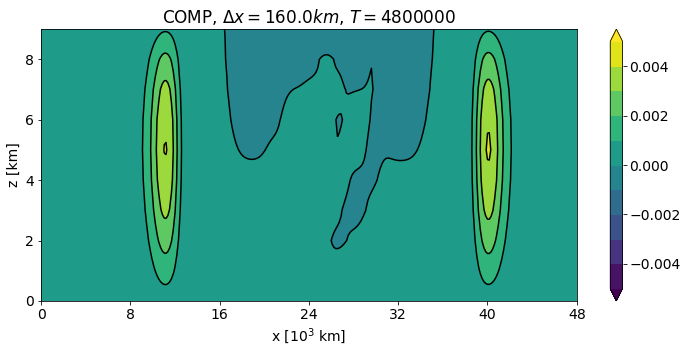

In [1158]:
import matplotlib.pyplot as plt
wave_type = '_planetary'
if wave_type == '_long':
    dx = '20.0'
    T = '60000'
    ticks = [0,1,2,3,4,5,6] # long wave
    lvls = np.arange(-0.0025,0.00251,0.0005)
#     lvls = np.arange(-0.005,0.005,0.001)
if wave_type == '_planetary':
    dx = '160.0'
    T = '4800000'
    tend = 4800
    ticks = [0,8,16,24,32,40,48] # planetary wave
    lvls = np.linspace(-0.005,0.005,11)
    
    
fig = plt.figure(figsize=(12,5))
arr = cb1
plt.contour(arr,levels=lvls,colors='k')
plt.contourf(arr,levels=lvls,extend='both')
plt.colorbar()
plt.title("COMP, $\Delta x = %s km$, $T = %s$" %(dx,T))

plt.xticks(np.arange(0,301,50),ticks)
plt.yticks(np.arange(0,10,2),[0,2,4,6,8,10])
plt.xlabel('x [$10^3$ km]')
plt.ylabel('z [km]')

plt.show()

0.066970706 7.599999999999916 0.47499999999999476


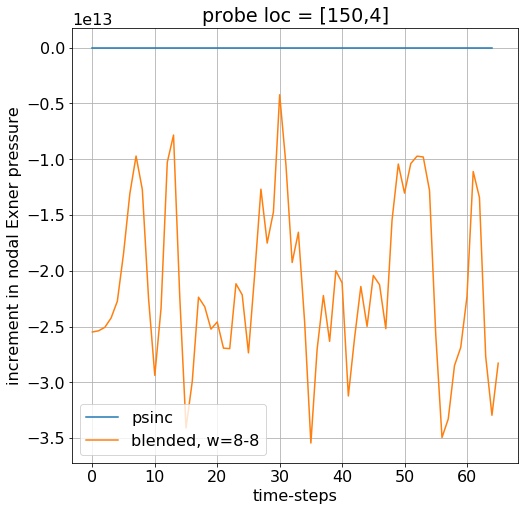

In [1161]:
Nsteps = 67
times = np.arange(0,Nsteps)
times = times[1:]
# times = times[210:240]
probe_loc = [150,4]

p_ref=1e5

avg = True
diff = True

attribute = 'p2_nodes'

suffix = '%s_psinc_debug' %scale
tag = tags[9]
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

# suffix = '%s_psinc_debug' %scale
# tag = tags[9]
# psinc1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

tag = tags[9]
suffix = '%s_w=8-8' %scale
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

# suffix = '%s_comp_debug' %scale
# tag = tags[9]
# suffix = '%s_w=10-6' %scale
# comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

psinc *= p_ref
psinc1 *= p_ref
comp *= p_ref
cb1 *= p_ref

alst = np.arange(-16,16.1,0.1)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    cb2s = sciim.shift(cb1,ii, mode ='constant',cval=psinc[-1])
    norm = np.linalg.norm(cb2s-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
    
print(min_norm, min_weight, min_weight/16)

cb10 = np.copy(cb1)
# min_weight = 6
# cb1 = sciim.shift(cb1, min_weight/16,mode='constant',cval=psinc[-1])

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(psinc,-8/16)

pl = pt.plotter_1d(ncols=1,nrows=1,figsize=(8,8))

ax = pl.get_ax(0)
# ax.plot(psinc, label='psinc at half time-level')

ax.plot(psinc, label='psinc')
ax.plot(comp, label='blended, w=8-8')
# ax.plot(psinc1-psinc, label='difference')
# ax.plot(comp-psinc1, label='difference1')
# ax.plot(cb21, label='cb21')
# ax.plot(cb22, label='cb22')
ax.set_ylabel('increment in nodal Exner pressure')
ax.set_xlabel('time-steps')
ax.set_title('probe loc = [%i,%i]' %(probe_loc[0],probe_loc[1]))
ax.grid()
ax.legend()
# ax.set_xlim([200,250])

pl.img.show()

In [1032]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [1252]:
Nsteps = 67
times = np.arange(0,Nsteps)
times = times[1:]
# idxs = np.arange(150,270)
idxs = np.arange(0,300)

attribute = 'p2_nodes'
tag_id = 9
tag = tags[tag_id]
print(tag)

mws = []
mws_comp = []
for idx in idxs:
    probe_loc = [idx,5]

    avg = True
    diff = False

    suffix = '%s_psinc_debug' %scale
    
    psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = '%s_w=8-8' %scale
    cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

    suffix = '%s_comp_debug' %scale
    comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    psinc *= p_ref
    comp *= p_ref
    cb1 *= p_ref
    
    alst = np.arange(-16,16.1,0.1)
    min_norm, min_weight = np.inf, np.inf
    min_norm_comp, min_weight_comp = np.inf, np.inf
    for i in alst:
        ii = i / 16
        shifted_comp = np.copy(comp)
        shifted = np.copy(cb1)
#         shifted = np.pad(shifted,[2,2],mode='wrap')
        if ii >0.0:
            cval_comp = find_nearest(psinc,comp[0])
            cval_cb1 = find_nearest(psinc,cb1[0])
        else:
            cval_comp = find_nearest(psinc,comp[-1])
            cval_cb1 = find_nearest(psinc,cb1[-1])
            
        shifted_comp = sciim.shift(shifted_comp,ii, mode ='constant',cval=cval_comp)
        shifted = sciim.shift(shifted,ii, mode ='constant',cval=cval_cb1)

#         shifted = shifted[2:-2]

        norm_comp = np.linalg.norm(shifted_comp-psinc)
        norm = np.linalg.norm(shifted-psinc)

        if norm_comp < min_norm_comp:
            min_norm_comp = norm_comp
            min_weight_comp = i
            min_lst_comp = [[shifted_comp,'cb2, %.3f' %i],[psinc,'psinc'],[shifted_comp-psinc,'diff']]
            shifted0_comp = np.copy(shifted_comp)
            
        if norm < min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[shifted,'cb2, %.3f' %i],[psinc,'psinc'],[shifted-psinc,'diff']]
            shifted0 = np.copy(shifted)

#     print(idx, min_norm, min_weight, min_norm_comp, min_weight_comp)
    mws.append(min_weight)
    mws_comp.append(min_weight_comp)
    
np.savetxt('igwr_mws_%i.txt' %tag_id,mws)
np.savetxt('igwr_mws_comp_%i.txt' %tag_id,mws_comp)

after_full_step


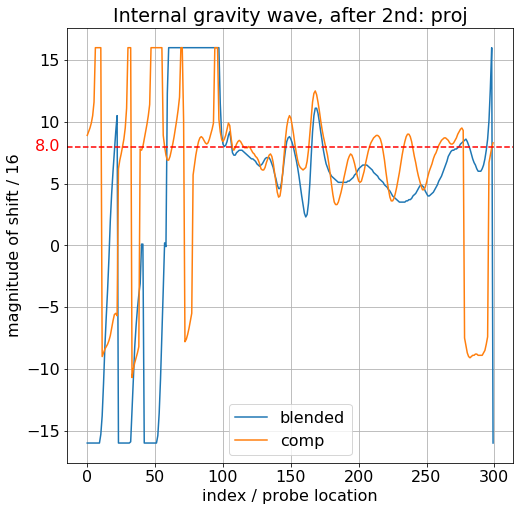

4.253666666666594
6.034333333333255


In [1255]:
import matplotlib.transforms as transforms
mws0 = np.copy(mws)
mws0_comp = np.copy(mws_comp)

pl = pt.plotter_1d(nrows=1,ncols=1,figsize=(8,8))
ax = pl.get_ax(0)
ax.plot(idxs,mws, label='blended')
ax.plot(idxs,mws_comp, label='comp')
hline = 8.0
ax.axhline(hline, ls='--', c='r')

titles = {
    0: 'before everything',
    1: 'before 1st projection advect',
    2: 'after 1st projection advect',
    3: 'after 1st proj. euler explicit',
    4: '1st proj: euler impl',
    5: 'after 1st proj: pi reset',
    6: '2nd proj: after euler forward',
    7: '2nd proj: after advect',
    8: '2nd proj: after euler explicit',
    9: 'after 2nd: proj'
}

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.0,hline, "{:.1f}".format(hline), color="red", transform=trans, 
        ha="right", va="center")

ax.set_xlabel("index / probe location")
ax.set_ylabel("magnitude of shift / 16")
ax.set_title("Internal gravity wave, %s" %titles[tag_id])

yticks = ax.yaxis.get_major_ticks()
# yticks[4].label1.set_visible(False)

ax.legend()
ax.grid()
pl.img.show()
print(np.mean(mws))
print(np.mean(mws_comp))